In [ ]:
!wget https://www.dropbox.com/s/6sprpz5e6snyppg/Recognize_animals_dataset.zip?dl=0



In [ ]:
!unzip /content/Recognize_animals_dataset.zip?dl=0

In [ ]:
#IMPORTS

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
base_model = InceptionV3(input_shape=(256,256,3), include_top=False)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units=5, activation='sigmoid')(X)

#Final Model
model = Model(base_model.input, X)

#complie the model

model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics=['accuracy'])

#summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

Pre-Process data using Data Generator

In [ ]:
train_datagen = ImageDataGenerator(featurewise_center=True, 
                                   rotation_range=0.4, 
                                   width_shift_range=0.3, 
                                   horizontal_flip=True, 
                                   preprocessing_function=preprocess_input,
                                   zoom_range=0.4,
                                   shear_range=0.4)

In [ ]:
train_data = train_datagen.flow_from_directory(directory='/content/Recognize animals dataset/animal_dataset_intermediate/train', 
                                               target_size=(256,256), 
                                               batch_size=64)

Found 8196 images belonging to 5 classes.


In [ ]:
train_data.class_indices

{'elefante_train': 0,
 'farfalla_train': 1,
 'mucca_train': 2,
 'pecora_train': 3,
 'scoiattolo_train': 4}

Visualizing the data

In [ ]:
t_img, label = train_data.next()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
t_img

In [ ]:
t_img.shape

(64, 256, 256, 3)

In [ ]:
def plotImages(img_arr, label):
  '''
  input : image array
  output: plot images
  '''
  for idx, img in enumerate( img_arr ):
    if idx <= 10 :
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


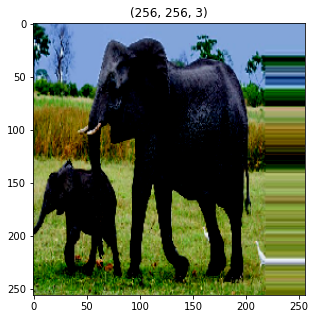

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


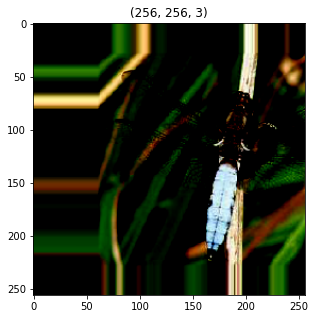

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


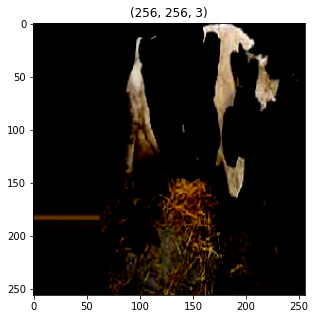

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


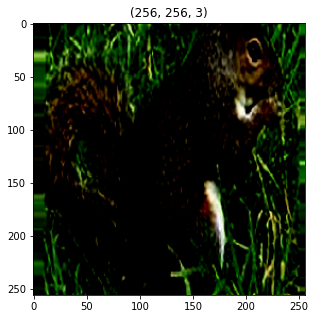

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


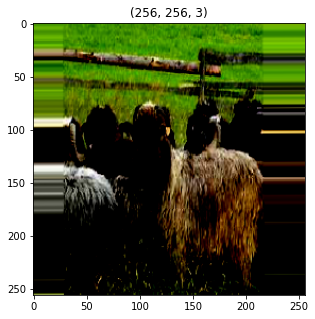

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


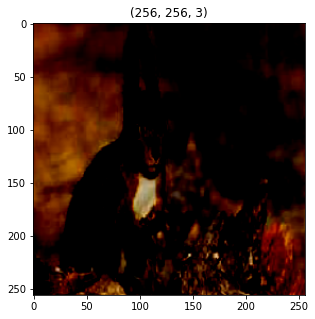

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


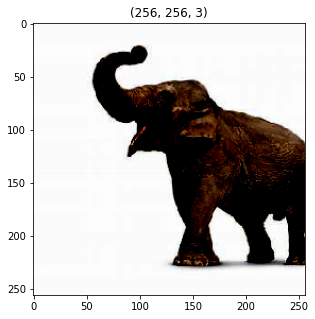

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


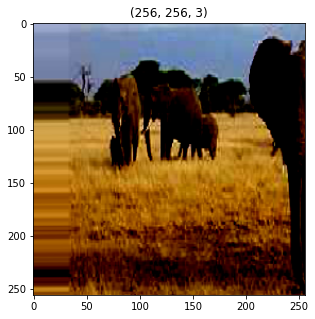

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


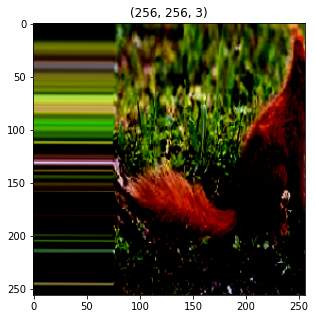

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


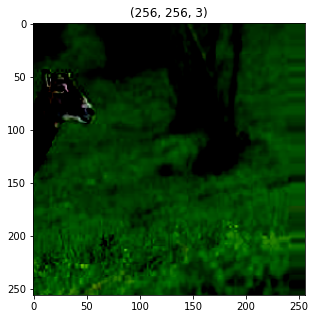

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


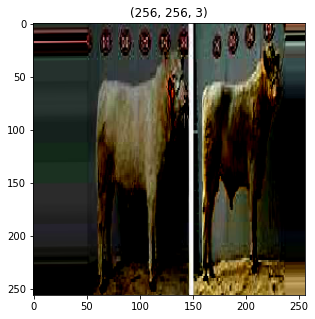

In [ ]:
plotImages(t_img, label)

# **Model Check Point**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(filepath="./best_model.h5",
                     monitor="accuracy", 
                     verbose = 1, 
                     save_best_only=True)

es = EarlyStopping(monitor= "accuracy",
                   min_delta = 0.01,
                   patience = 5,
                   verbose = 1)

cb = [mc,es]

In [ ]:
his = model.fit_generator(train_data, 
                          steps_per_epoch=10, 
                          epochs=30, 
                          callbacks=cb)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.3051 - accuracy: 0.6276
Epoch 1: accuracy improved from -inf to 0.62759, saving model to ./best_model.h5
10/10 [==============================] - 28s 1s/step - loss: 1.3051 - accuracy: 0.6276
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.2922 - accuracy: 0.8859
Epoch 2: accuracy improved from 0.62759 to 0.88594, saving model to ./best_model.h5
10/10 [==============================] - 12s 1s/step - loss: 0.2922 - accuracy: 0.8859
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.2167 - accuracy: 0.9406
Epoch 3: accuracy improved from 0.88594 to 0.94063, saving model to ./best_model.h5
10/10 [==============================] - 13s 1s/step - loss: 0.2167 - accuracy: 0.9406
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.1211 - accuracy: 0.9469
Epoch 4: accuracy improved from 0.94063 to 0.94687, saving model to ./best_model.h5
10/10 [=======================

In [ ]:
from keras.models import load_model

model = load_model('/content/best_model.h5')

In [ ]:
h = his.history
h.keys()



dict_keys(['loss', 'accuracy'])

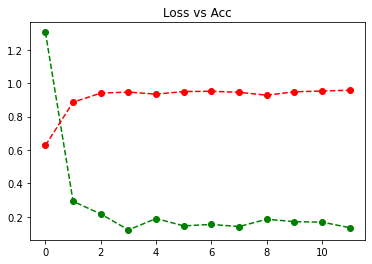

In [ ]:
plt.plot(h['loss'], 'go--', c='green')
plt.plot(h['accuracy'], 'go--', c='red')

plt.title('Loss vs Acc')
plt.show()

**Validate our model**

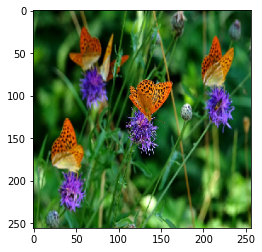

butterfly
[[4.2921985e-14 1.0000000e+00 1.0431680e-09 4.1667092e-10 1.8407889e-17]]


In [ ]:
from keras.applications.imagenet_utils import decode_predictions
path = '/content/Recognize animals dataset/animal_dataset_intermediate/test/ea35b2062bf5033ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg'
img = load_img(path, target_size=(256,256))

imgplot = plt.imshow(img)
plt.show()
i = img_to_array(img)
i = preprocess_input(i)

input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

prediction = model.predict(input_arr)

plt.show()

if(pred == 0):
  print('Elephant')
elif(pred == 1):
  print('butterfly')
elif(pred == 2):
  print('cow')
elif(pred == 3):
  print('sheep')
else:
  print('squirrel')


print(prediction)